In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5432,
    database="qversity",
    user="qversity-admin",
    password="qversity-admin"
)

query1 = """
select
	registration_year,
	registration_month,
	count(*) as total_customers
from public_gold.gold_customer_trends
group by registration_year, registration_month
order by registration_year, registration_month;
"""

query2 = """
select
    operator,
    registration_year,
    registration_month,
    count(*) as total_customers
from public_gold.gold_customer_trends
group by operator, registration_year, registration_month
order by operator, registration_year, registration_month;
"""

df1 = pd.read_sql(query1, conn)
df2 = pd.read_sql(query2, conn)

conn.close()

/tmp/ipykernel_120760/2769544841.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)
/tmp/ipykernel_120760/2769544841.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


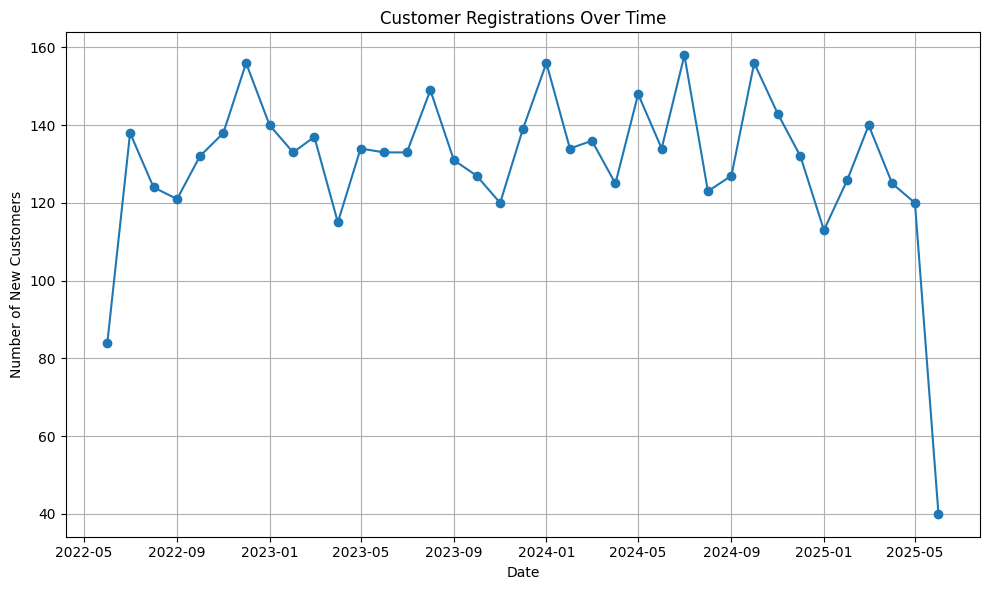

In [2]:
# Create a datetime column for easier plotting
df1['date'] = pd.to_datetime(df1['registration_year'].astype(str) + '-' + df1['registration_month'].astype(str).str.zfill(2))

# Plot customer registrations over time
plt.figure(figsize=(10,6))
plt.plot(df1['date'], df1['total_customers'], marker='o')
plt.title('Customer Registrations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

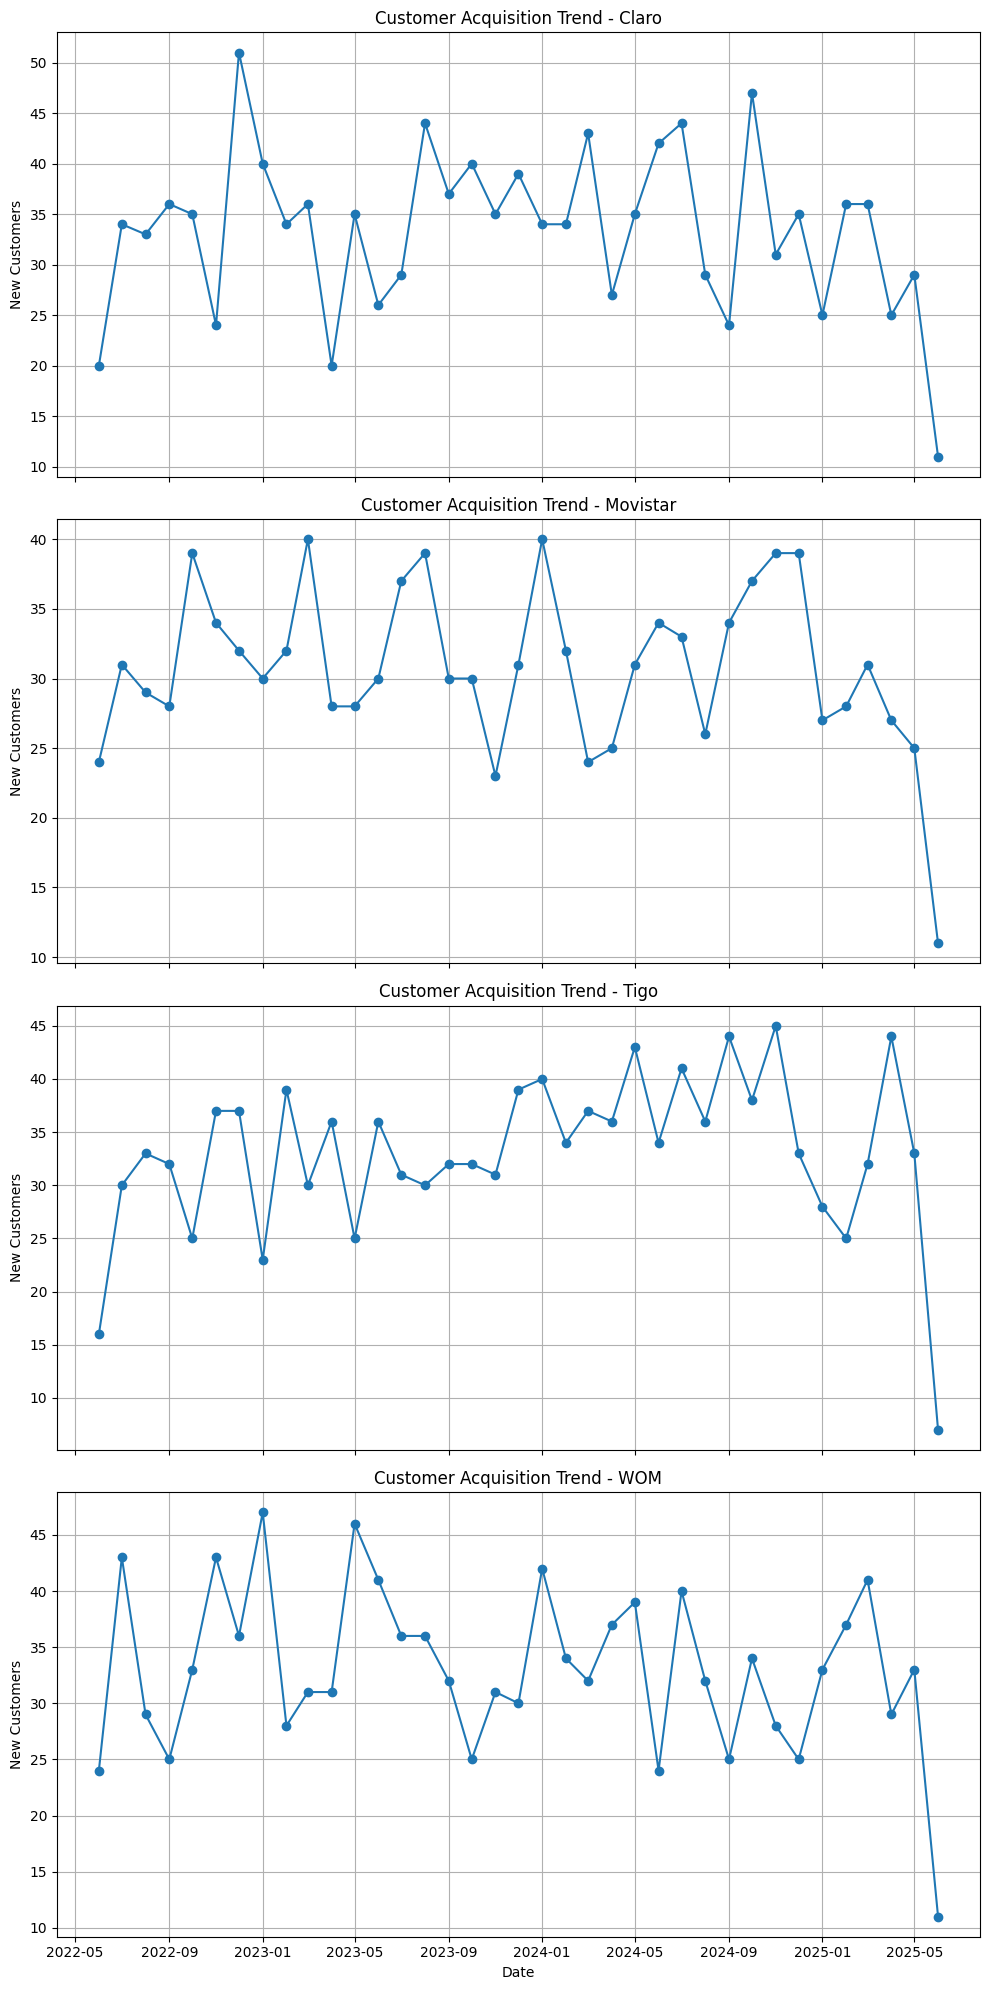

In [3]:

# Ensure registration_month is always two digits
df2['month_str'] = df2['registration_month'].astype(str).str.zfill(2)
df2['date'] = pd.to_datetime(df2['registration_year'].astype(str) + '-' + df2['month_str'])

# Get unique operators
operators = df2['operator'].unique()

# Create one subplot per operator
fig, axes = plt.subplots(nrows=len(operators), ncols=1, figsize=(10, 5 * len(operators)), sharex=True)

# If only one operator, axes won't be a list
if len(operators) == 1:
    axes = [axes]

for i, operator in enumerate(operators):
    df_op = df2[df2['operator'] == operator]
    axes[i].plot(df_op['date'], df_op['total_customers'], marker='o')
    axes[i].set_title(f"Customer Acquisition Trend - {operator}")
    axes[i].set_ylabel("New Customers")
    axes[i].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()
